# Diablo Data Analysis

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('completedata.csv')

C:\Users\shukl\AppData\Local\Temp\ipykernel_13600\1451023048.py:1: DtypeWarning: Columns (5,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('completedata.csv')


In [16]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [17]:
df.head()

,created_at,created_at_str,doc_id,doc_type,entities,external_link,title,content,source_platform,attachments,user_id,user_name,channel_name,thread_id,parent_doc_id
0,2023-06-13 07:35:49,2023-06-13 13:05:49,0db9ad670415179b013071139adce962e32d5b6bca469b...,wiki,"['diablo', 'Classes']",https://diablo.fandom.com/wiki/Classes,Classes,The Classes of the Diablo series are an array ...,fandom,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-06-13 07:35:49,2023-06-13 13:05:49,783b4b9ac1fab11d3b6f5a2daa98e4c9e09627abb41118...,wiki,"['diablo', 'Classes']",https://diablo.fandom.com/wiki/Classes,Classes Diablo I,"In Diablo I, each class had much more in commo...",fandom,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-06-13 07:35:49,2023-06-13 13:05:49,584e96c45ccbc6388f8465adb480d385e7245c348a9b35...,wiki,"['diablo', 'Classes']",https://diablo.fandom.com/wiki/Classes,Classes Diablo I,"to learn all the spells in the game, with maxi...",fandom,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-06-13 07:35:49,2023-06-13 13:05:49,e8d45b42e6403ecfb08a11c7ebfa9bbbdcb99f4f25c9b6...,wiki,"['diablo', 'Classes']",https://diablo.fandom.com/wiki/Classes,Classes Diablo: Hellfire,"In Diablo: Hellfire, only one class was added,...",fandom,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-06-13 07:35:49,2023-06-13 13:05:49,2e95ea83ca53f68a2ac6f6e8dde57648381d744bdc9ac7...,wiki,"['diablo', 'Classes']",https://diablo.fandom.com/wiki/Classes,Classes Diablo: Hellfire,"the Warrior, he gave up whatever magical abili...",fandom,NaN,NaN,NaN,NaN,NaN,NaN


### Cheaking the Null Values Percentage

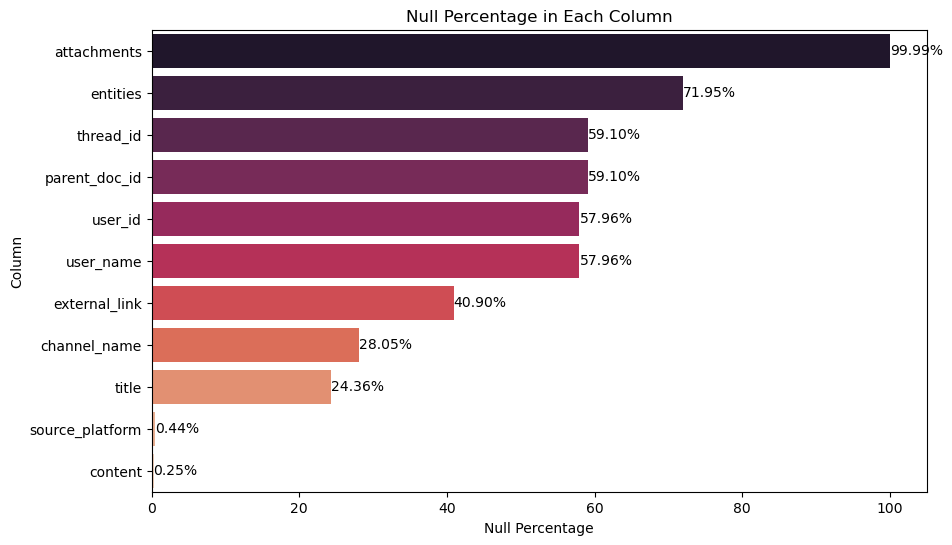

,Column,Null Percentage
attachments,attachments,99.990761
entities,entities,71.948797
thread_id,thread_id,59.103107
parent_doc_id,parent_doc_id,59.103107
user_id,user_id,57.959103
user_name,user_name,57.959103
external_link,external_link,40.896893
channel_name,channel_name,28.051203
title,title,24.356708
source_platform,source_platform,0.442651


In [18]:
def null_percentage(df):
    # Calculate the total number of rows in the DataFrame
    total_rows = len(df)
    
    # Calculate the percentage of null values for each column
    percentages = (df.isnull().sum() / total_rows) * 100
    
    # Create a new DataFrame to store the results and exclude columns with no null values
    result_df = pd.DataFrame({'Column': df.columns, 'Null Percentage': percentages})
    result_df = result_df[result_df['Null Percentage'] > 0]  # Exclude columns with 0% nulls
    
    if result_df.empty:
        print("No columns with null values found.")
        return result_df
    
    # Sort the DataFrame by Null Percentage in descending order for better visualization
    result_df = result_df.sort_values(by='Null Percentage', ascending=False)
    
    # Create a beautiful bar chart using Seaborn with the 'rocket' color palette
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Null Percentage', y='Column', data=result_df, palette='rocket')
    plt.xlabel('Null Percentage')
    plt.ylabel('Column')
    plt.title('Null Percentage in Each Column')
    
    # Display percentage values on the bars
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width:.2f}%', (width, p.get_y() + p.get_height()/2), ha='left', va='center', color='black')
    
    plt.show()

    return result_df

# Example usage:
# Assuming you have a DataFrame called 'my_data'
result = null_percentage(df)
result

In [19]:
df.isnull().sum()

created_at              0
created_at_str          0
doc_id                  0
doc_type                0
entities           171318
external_link       97380
title               57996
content               598
source_platform      1054
attachments        238089
user_id            138007
user_name          138007
channel_name        66793
thread_id          140731
parent_doc_id      140731
dtype: int64

### Checking for duplicate

In [20]:
df.doc_id[df.duplicated()].count()

5915

Dublicate as per doc_id

In [21]:
df.doc_id[df.duplicated('doc_id')].count()

16597

In [22]:
df.columns

Index(['created_at', 'created_at_str', 'doc_id', 'doc_type', 'entities',
       'external_link', 'title', 'content', 'source_platform', 'attachments',
       'user_id', 'user_name', 'channel_name', 'thread_id', 'parent_doc_id'],
      dtype='object')

### Document ID Validation

In [23]:
df.shape

(238111, 15)

In [24]:
import re

def check_doc_id_format(df):
    # Regular expression pattern for valid document IDs
    regex_pattern = r"id:uds:uds::[A-Za-z0-9]+"

    valid_count = 0
    invalid_count = 0

    # Loop through each document ID in the DataFrame
    for doc_id in df.doc_id:
        # Check if the ID matches the regex pattern
        if re.match(regex_pattern, doc_id):
            valid_count += 1
        else:
            invalid_count += 1

    print("Documents with valid IDs:", valid_count)
    print("Documents with invalid IDs:", invalid_count)

    # Return the counts as a tuple
    return valid_count, invalid_count

# Example usage:
# Assuming you have a DataFrame called 'my_data'
valid_count, invalid_count = check_doc_id_format(df)

Documents with valid IDs: 0
Documents with invalid IDs: 238111


### Doc_Type Validation

In [25]:
def validate_doc_types(df, valid_doc_types):
    # Get the set of all values in the doc_type field
    all_doc_types = set(df['doc_type'])

    # Initialize a dictionary to store counts of valid and invalid document types
    counts = {'Valid': 0, 'Invalid': 0}
    
    # Initialize a list to store invalid document types
    invalid_doc_types = []

    # Loop through each document type
    for doc_type in all_doc_types:
        # Check if the document type is a valid string and in the set of valid document types
        if isinstance(doc_type, str) and doc_type in valid_doc_types:
            counts['Valid'] += 1
        else:
            counts['Invalid'] += 1
            invalid_doc_types.append(doc_type)

    # Print the counts
    print("Counts of Document Types:")
    print("------------------------")
    for doc_type, count in counts.items():
        print(f"{doc_type}: {count}")
    
    # Print the list of invalid document types
    if counts['Invalid'] > 0:
        print("\nInvalid Document Types:")
        print("-----------------------")
        for invalid_type in invalid_doc_types:
            print(invalid_type)

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a set of valid document types
valid_document_types =['text', 'forum', 'public_thread', 'news', 'stage_voice','voice','post','video','wiki','comment','webpage']
validate_doc_types(df, valid_document_types)

Counts of Document Types:
------------------------
Valid: 5
Invalid: 0


### Doc_type percentage distribution

In [26]:
(df.doc_type[~df.doc_type.isnull()].value_counts()/df.doc_type[~df.doc_type.isnull()].shape[0])*100

doc_type
comment    40.896893
video      29.742431
wiki       27.086947
post        1.309473
webpage     0.964256
Name: count, dtype: float64

### Calculate null value percentage for each doc_type

In [27]:
# Calculate null value percentage for each doc_type
null_percentage = df.groupby('doc_type')[['attachments','entities','thread_id','parent_doc_id','user_id','user_name','external_link','channel_name','title','source_platform','content']].apply(lambda x: round((x.isnull().sum() / len(x)) * 100, 2))

In [28]:
# Calculate null value percentage for each doc_type
null_percentage = df.groupby('doc_type')[[
    'user_name','content','parent_doc_id','attachments',
    'title','thread_id','entities','channel_name',
    'title','source_platform','content']].apply(lambda x: round((x.isnull().sum() / len(x)) * 100, 2))

In [29]:
null_percentage

,user_name,content,parent_doc_id,attachments,title,thread_id,entities,channel_name,title,source_platform,content
doc_type,,,,,,,,,,,
comment,0.4,0.00,0.0,100.00,59.56,0.0,100.0,0.0,59.56,0.00,0.00
post,0.0,19.11,100.0,100.00,0.00,100.0,100.0,0.0,0.00,0.00,19.11
video,100.0,0.00,100.0,100.00,0.00,100.0,100.0,0.0,0.00,0.00,0.00
webpage,100.0,0.00,100.0,99.04,0.00,100.0,0.0,100.0,0.00,0.00,0.00
wiki,100.0,0.00,100.0,100.00,0.00,100.0,0.0,100.0,0.00,1.63,0.00


### Heatmap for the above datapoints

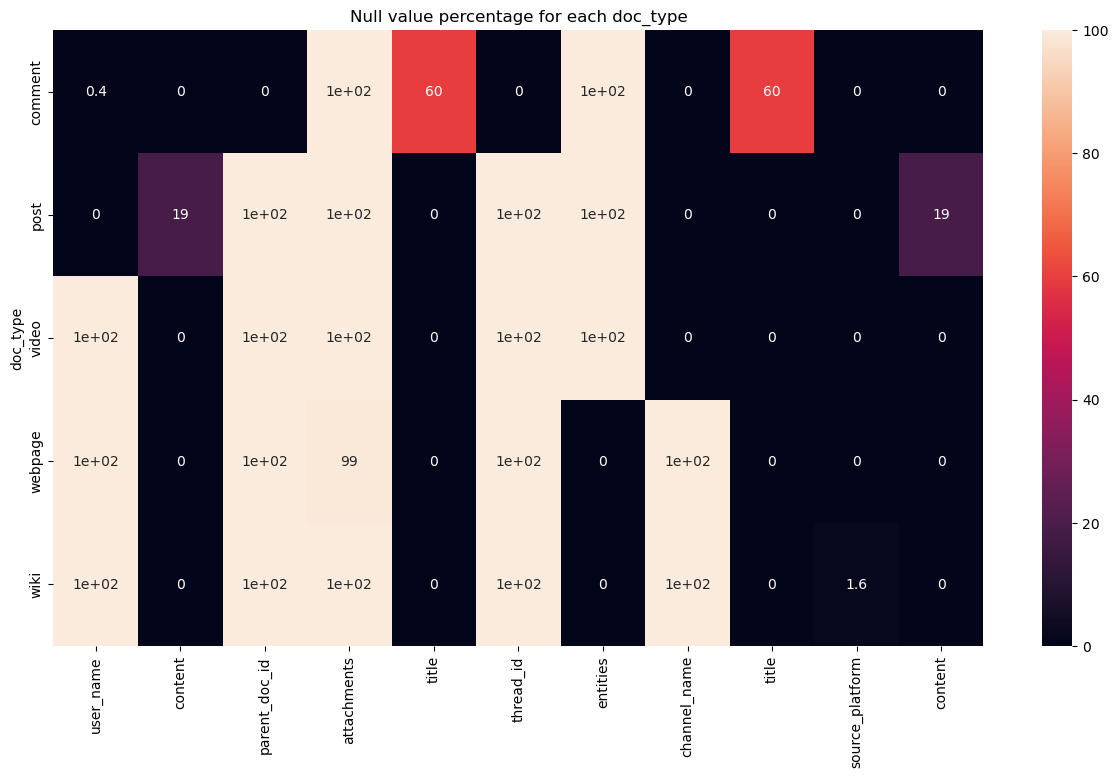

In [30]:
plt.figure(figsize=(15,8))
plt.title('Null value percentage for each doc_type')
sns.heatmap(null_percentage,annot=True)
plt.show()

### Entities Validation 

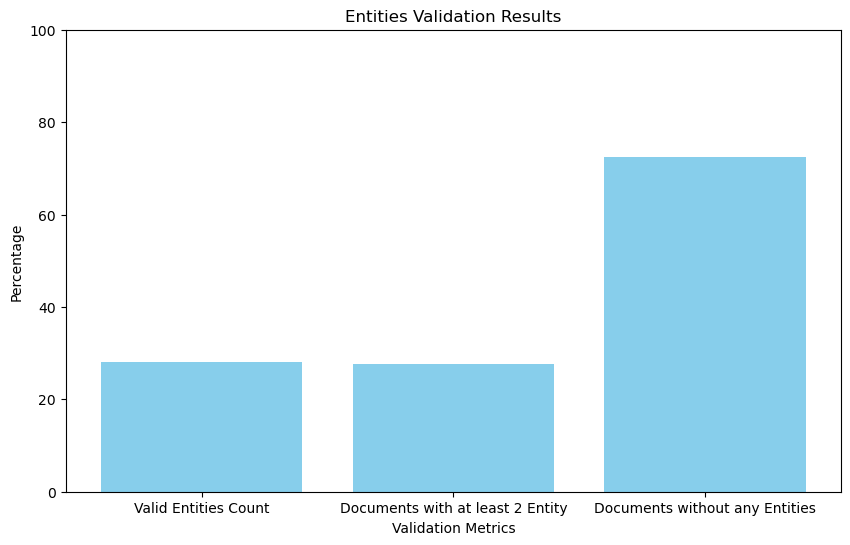

{'Total Documents': 238111,
 'Valid Entities Percentage': 28.05,
 'Documents with at least 2 Entity Percentage': 27.59,
 'Documents without any Entities Percentage': 72.41}

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def entities_validation(dataframe):
    # Check if the 'entities' column is present in the DataFrame
    if 'entities' not in dataframe.columns:
        return "The 'entities' column does not exist in the DataFrame."

    # Filter out rows where 'entities' is not null and is an array
    valid_entities_count = 0
    valid_documents_with_entities = 0
    
    try:
        # Convert strings to lists using eval for the 'entities' column
        dataframe['entities'][~dataframe['entities'].isnull()] = dataframe['entities'][~dataframe['entities'].isnull()].apply(lambda x: eval(x))
        for entities_list in dataframe['entities']:
            if isinstance(entities_list, list) and len(entities_list) > 0:
                valid_entities_count += 1
                if len(entities_list) > 1:
                    valid_documents_with_entities += 1

        total_documents = len(dataframe)

        # Calculate percentages
        valid_entities_percentage = (valid_entities_count / total_documents) * 100
        valid_documents_with_entities_percentage = (valid_documents_with_entities / total_documents) * 100
        documents_without_entities_percentage = 100 - valid_documents_with_entities_percentage

        # Create a bar chart to visualize the validation results
        plt.figure(figsize=(10, 6))
        validation_results = {
            "Valid Entities Count": valid_entities_percentage,
            "Documents with at least 2 Entity": valid_documents_with_entities_percentage,
            "Documents without any Entities": documents_without_entities_percentage
        }
        plt.bar(validation_results.keys(), validation_results.values(), color='skyblue')
        plt.xlabel('Validation Metrics')
        plt.ylabel('Percentage')
        plt.title('Entities Validation Results')
        plt.ylim(0, 100)  # Set the y-axis range to 0-100 for percentages
        plt.show()

        return {
            "Total Documents": total_documents,
            "Valid Entities Percentage": round(valid_entities_percentage,2),
            "Documents with at least 2 Entity Percentage": round(valid_documents_with_entities_percentage,2),
            "Documents without any Entities Percentage": round(documents_without_entities_percentage,2)
        }
    
    except:
        
        for entities_list in dataframe['entities']:
            if isinstance(entities_list, list):
                valid_entities_count += 1
                if len(entities_list) > 1:
                    valid_documents_with_entities += 1

        total_documents = len(dataframe)

        # Calculate percentages
        valid_entities_percentage = (valid_entities_count / total_documents) * 100
        valid_documents_with_entities_percentage = (valid_documents_with_entities / total_documents) * 100
        documents_without_entities_percentage = 100 - valid_documents_with_entities_percentage

        # Create a bar chart to visualize the validation results
        plt.figure(figsize=(10, 6))
        validation_results = {
            "Valid Entities Count": valid_entities_percentage,
            "Documents with at least 2 Entity": valid_documents_with_entities_percentage,
            "Documents without any Entities": documents_without_entities_percentage
        }
        plt.bar(validation_results.keys(), validation_results.values(), color='skyblue')
        plt.xlabel('Validation Metrics')
        plt.ylabel('Percentage')
        plt.title('Entities Validation Results')
        plt.ylim(0, 100)  # Set the y-axis range to 0-100 for percentages
        plt.show()

        return {
            "Total Documents": total_documents,
            "Valid Entities Percentage": round(valid_entities_percentage,2),
            "Documents with at least 2 Entity Percentage": round(valid_documents_with_entities_percentage,2),
            "Documents without any Entities Percentage": round(documents_without_entities_percentage,2)
        }

# Example usage:
# Assuming you have a DataFrame called 'my_data'
result = entities_validation(df)
result


In [37]:
filtered_df = df[df['entities'].apply(lambda x: isinstance(x, list))]

In [43]:
# Explode the 'entities' column to create separate rows for each entity in the list
exploded_df = filtered_df.explode('entities')

# Get unique values from the exploded 'entities' column
unique_entities = exploded_df['entities'].unique()
unique_count = exploded_df['entities'].nunique()
print(unique_count)
unique_entities

15722


array(['diablo', 'Classes', 'Hirelings', ...,
       'Quest Objectives - Shattered Tribute', 'Quest Rundown',
       'Key Locations and NPCs'], dtype=object)

In [44]:
df.source_platform.unique()

array(['fandom', nan, 'offcial', 'maxroll', 'reddit', 'youtube'],
      dtype=object)

### Source Platform Validation

In [45]:
import pandas as pd

def source_platform_validation(dataframe, valid_platforms):
    # Check if the 'source_platform' column is present in the DataFrame
    if 'source_platform' not in dataframe.columns:
        return "The 'source_platform' column does not exist in the DataFrame."

    # Filter out rows where 'source_platform' is not null
    valid_platform_count = 0
    invalid_platform_count = 0
    invalid_platforms = []

    for platform in dataframe['source_platform']:
        if isinstance(platform, str) and platform in valid_platforms:
            valid_platform_count += 1
        else:
            invalid_platform_count += 1
            invalid_platforms.append(platform)

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid Platform Count": valid_platform_count,
        "Invalid Platform Count": invalid_platform_count,
        "Invalid Platforms": set(invalid_platforms)
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a list of valid platforms
valid_platforms = ["Discord",'fandom','offcial','maxroll','reddit','youtube']
result = source_platform_validation(df, valid_platforms)
result


{'Total Documents': 238111,
 'Valid Platform Count': 237057,
 'Invalid Platform Count': 1054,
 'Invalid Platforms': {nan}}

In [46]:
df[['created_at_str','created_at']].dtypes

created_at_str    object
created_at        object
dtype: object

In [47]:
pd.to_datetime(df['created_at'], errors='coerce')

0        2023-06-13 07:35:49
1        2023-06-13 07:35:49
2        2023-06-13 07:35:49
3        2023-06-13 07:35:49
4        2023-06-13 07:35:49
                 ...        
238106   2023-06-08 07:30:18
238107   2023-06-08 07:30:18
238108   2023-06-08 07:30:18
238109   2023-06-08 07:30:18
238110   2023-06-08 07:30:18
Name: created_at, Length: 238111, dtype: datetime64[ns]

### Validate Dates And Timestamps

In [48]:
import pandas as pd
from datetime import datetime

def validate_dates_and_timestamps(dataframe):
    # Check if the 'created_at' and 'created_at_str' columns are present in the DataFrame
    if 'created_at' not in dataframe.columns or 'created_at_str' not in dataframe.columns:
        return "The required columns 'created_at' and 'created_at_str' do not exist in the DataFrame."

    # Convert 'created_at' to datetime and handle invalid values with 'coerce'
    dates = pd.to_datetime(dataframe['created_at'], errors='coerce')

    current_datetime = datetime.now()

    valid_dates = 0
    invalid_dates = 0

    for date in dates:
        if date < current_datetime:
            valid_dates += 1
        else:
            invalid_dates += 1

    v_d = 0
    iv_d = 0

    for created_at, created_at_str in zip(dates, dataframe['created_at_str']):
        x = str(created_at)[:10]
        y = str(created_at_str)[:10]
        if x == y:
            v_d += 1
        else:
            iv_d += 1

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid Dates Count": valid_dates,
        "Invalid Dates Count": invalid_dates,
        "Valid Timestamp Count": v_d,
        "Invalid Timestamp Count": iv_d
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data'
result = validate_dates_and_timestamps(df)
result

{'Total Documents': 238111,
 'Valid Dates Count': 238111,
 'Invalid Dates Count': 0,
 'Valid Timestamp Count': 191882,
 'Invalid Timestamp Count': 46229}

### is_public Validation

In [49]:
import pandas as pd

def is_public_validation(dataframe):
    # Check if the 'is_public' column is present in the DataFrame
    if 'is_public' not in dataframe.columns:
        return "The 'is_public' column does not exist in the DataFrame."

    valid_count = 0
    invalid_count = 0
    true=0
    false=0

    for is_public in dataframe['is_public']:
        if isinstance(is_public, bool):
            valid_count += 1
            if is_public:
                true+=1
            else:
                false+=1
        else:
            invalid_count += 1

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid is_public Count": valid_count,
        "Invalid is_public Count": invalid_count,
        "True":true,
        "False":false
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data'
result = is_public_validation(df)
result


"The 'is_public' column does not exist in the DataFrame."

In [50]:
# # Filter the DataFrame to select rows where 'is_public' is True, then group by 'doc_type' and count the occurrences.
# (df[df.is_public].groupby('doc_type')[['is_public']].count()/df[df.is_public].shape[0])*100

AttributeError: 'DataFrame' object has no attribute 'is_public'

In [52]:
# # Filter the DataFrame to select rows where 'is_public' is False
# # Group the filtered DataFrame by 'doc_type' and count the occurrences of 'is_public'
# (df[~df.is_public].groupby('doc_type')[['is_public']].count()/df[~df.is_public].shape[0])*100


### Title Case Validation

In [67]:
import pandas as pd
import re

def title_case_check(dataframe, column_name):
    if column_name not in dataframe.columns:
        return f"The '{column_name}' column does not exist in the DataFrame."

    valid_count = 0
    invalid_count = 0
    invalid_titles = []

    for Title in dataframe[column_name]:
        if isinstance(Title, str):  # Check if 'Title' is a string
            cleaned_string = re.sub(r'[^\w\s]', '', Title)
            if Title[0].isupper():
                valid_count += 1
            else:
                invalid_count += 1
                invalid_titles.append(Title)

    total_documents = len(dataframe)

    valid_titles_percentage = (valid_count / total_documents) * 100
    invalid_titles_percentage = (invalid_count / total_documents) * 100

    return {
        "Total Documents": total_documents,
        "Valid Titles Count": valid_count,
        "Valid Titles Percentage": round(valid_titles_percentage, 2),
        "Invalid Titles Count": invalid_count,
        "Invalid Titles Percentage": round(invalid_titles_percentage, 2),
        "Invalid Titles": set((invalid_titles))
    }

# Example usage:
result = title_case_check(df, 'title')
result


{'Total Documents': 238111,
 'Valid Titles Count': 163971,
 'Valid Titles Percentage': 68.86,
 'Invalid Titles Count': 16144,
 'Invalid Titles Percentage': 6.78,
 'Invalid Titles': {' Biography',
  ' In-game',
  ' Quotes',
  '"Abilities Panel" vs "Skill Tree Panel" key binds',
  '"Back to hell for you" artwork by me.',
  '"Diablo 4 has great build variety"',
  '"Diablo 4 is just Diablo 3 but 11 years later"',
  '"Game is great, enjoyable, much fun" to "game sucks, beside graphics"',
  '"I would like to speak to the one responsible for the servers"',
  '"In his ravenous hatred he found no peace."',
  '"It\'s pretty, I\'m gonna put points in it"',
  '"Kyovashad City OST" to keep me company until launch.',
  '"Secret" levels',
  '"We want to keep the numbers down." -dev Livestream Feb 24.',
  '"What\'s your main stat?" "Yes."',
  '"Who is Wudijo aka Rob2628?" lol - The most hilarious article I\'ve ever seen',
  '"early release" 6pm CDT.',
  '#flatSanctuary gang where you at?',
  "'Diablo 

In [68]:
import pandas as pd
import re

def title_case_check(dataframe, column_name):
    if column_name not in dataframe.columns:
        return f"The '{column_name}' column does not exist in the DataFrame."

    valid_count = 0
    invalid_count = 0
    invalid_titles = []

    for Title in dataframe[column_name]:
        if isinstance(Title, str):  # Check if 'Title' is a string
            cleaned_string = re.sub(r'[^\w\s]', '', Title)
            if Title[0].isupper():
                valid_count += 1
            else:
                invalid_count += 1
                invalid_titles.append(Title)

    total_documents = len(dataframe)

    valid_titles_percentage = (valid_count / total_documents) * 100
    invalid_titles_percentage = (invalid_count / total_documents) * 100

    return {
        "Total Documents": total_documents,
        "Valid Titles Count": valid_count,
        "Valid Titles Percentage": round(valid_titles_percentage, 2),
        "Invalid Titles Count": invalid_count,
        "Invalid Titles Percentage": round(invalid_titles_percentage, 2),
        "Invalid Titles": set((invalid_titles))
    }

# Example usage:
result = title_case_check(df, 'content')
result


{'Total Documents': 238111,
 'Valid Titles Count': 146464,
 'Valid Titles Percentage': 61.51,
 'Invalid Titles Count': 91049,
 'Invalid Titles Percentage': 38.24,
 'Invalid Titles': {'désormais l’affixe Renvoi des dégâts en difficulté Armageddo CydaéeCapacitésJeunes araignéesLes jeunes araignées frappent plus facilement les joueurs, mais leurs dégâts ont été diminués de 20% pour compenserEn difficulté Armageddon, les jeunes araignées vivent plus longtemps, se déploient plus loin et après 4 minutes, sont générées plus souvent CapacitésJeunes araignéesLes jeunes araignées frappent plus facilement les joueurs, mais leurs dégâts ont été diminués de 20% pour compenserEn',
  "didn't spoil great incarnations of evil Immortals them can only be banished for a while, but even from The underworld can't reach ours the world walk on it unrecognized When",
  'this obviously gets better as you go on you get more options to speed up the gameplay you get more attack speed you get more movement speed yo

### Spam Documents for Content

In [64]:
import pandas as pd

def spam_document_detection(dataframe, min_content_length=10):
    # Check if the 'content' column is present in the DataFrame
    if 'content' not in dataframe.columns:
        return "The 'content' column does not exist in the DataFrame."

    spam_count = 0
    valid_count = 0
    spam_documents = []

    for content in dataframe['content']:
        if isinstance(content, str):
            # Check if content is too short or nonsensical
            if len(content) < min_content_length:
                spam_count += 1
                spam_documents.append(content)
            else:
                valid_count += 1
        else:
            spam_count += 1  # Treat non-string content as spam

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid Documents Count": valid_count,
        "Spam Documents Count": spam_count,
        #"Spam Documents": set(spam_documents)
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a minimum content length of 50 characters
result = spam_document_detection(df, min_content_length=10)
print(result)


{'Total Documents': 238111, 'Valid Documents Count': 231551, 'Spam Documents Count': 6560}


### Spam Documents for Title

In [65]:
import pandas as pd

def spam_document_detection(dataframe, min_content_length=10):
    # Check if the 'content' column is present in the DataFrame
    if 'content' not in dataframe.columns:
        return "The 'content' column does not exist in the DataFrame."

    spam_count = 0
    valid_count = 0
    spam_documents = []

    for content in dataframe['title']:
        if isinstance(content, str):
            # Check if content is too short or nonsensical
            if len(content) < min_content_length:
                spam_count += 1
                spam_documents.append(content)
            else:
                valid_count += 1
        else:
            spam_count += 1  # Treat non-string content as spam

    total_documents = len(dataframe)

    return {
        "Total Documents": total_documents,
        "Valid Documents Count": valid_count,
        "Spam Documents Count": spam_count,
        #"Spam Documents": set(spam_documents)
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a minimum content length of 50 characters
result = spam_document_detection(df, min_content_length=10)
print(result)


{'Total Documents': 238111, 'Valid Documents Count': 174887, 'Spam Documents Count': 63224}


In [72]:
import pandas as pd

def title_content_validation(dataframe, min_tokens=3):
    # Ensure that "title" and "content" fields are strings and not empty or null
    if dataframe['title'].isnull().any() or not dataframe['title'].astype(str).str.strip().all():
        print("Error: Some 'title' values are missing or empty.")
        # return None

    if dataframe['content'].isnull().any() or not dataframe['content'].astype(str).str.strip().all():
        print("Error: Some 'content' values are missing or empty.")
        # return None

    # Check the distribution of the number of tokens for title and content
    title_tokens_count = dataframe['title'].str.split().str.len()
    content_tokens_count = dataframe['content'].str.split().str.len()

    # Check the number of documents with title and/or content less than X tokens
    if (title_tokens_count < min_tokens).any():
        print("Warning: Some documents have 'title' with fewer than {} tokens.".format(min_tokens))
        print("Value Counts:\n{}".format(title_tokens_count[title_tokens_count < min_tokens].value_counts()))

    if (content_tokens_count < min_tokens).any():
        print("Warning: Some documents have 'content' with fewer than {} tokens.".format(min_tokens))
        print("Value Counts:\n{}".format(content_tokens_count[content_tokens_count < min_tokens].value_counts()))

    # Replace NaN values with an appropriate placeholder
    dataframe['title']=dataframe['title'][~dataframe.title.isnull()]
    dataframe['content']=dataframe['content'][~dataframe.content.isnull()]

    # Filter out rows with NaN or null values in 'title' and 'content' columns
    dataframe1 = dataframe.dropna(subset=['title', 'content'])

    # Check documents that only have numbers or special characters in the content and/or title
    has_numbers_title = dataframe1['title'][dataframe1['title'].str.isnumeric()].count()
    has_numbers_content = dataframe1['content'][dataframe1['content'].str.isnumeric()].count()
    has_special_chars_title = dataframe1['title'][(dataframe1['title'].str.match(r'^[^a-zA-Z0-9]+$'))].count()
    has_special_chars_content = dataframe1['content'][(dataframe1['content'].str.match(r'^[^a-zA-Z0-9]+$'))].count()


    if has_numbers_title > 0 or has_numbers_content > 0:
        print(f"Warning: Some documents have numbers in the 'title' count: {has_numbers_title} or 'content' count: {has_numbers_content}.")
    else:
        print('Content and Title have no numbers.')

    if has_special_chars_title > 0 or has_special_chars_content > 0:
        print(f"Warning: Some documents have special characters in the 'title' count: {has_special_chars_title} or 'content' count: {has_special_chars_content}.")
    else:
        print('Content and title have no special characters.')
    
    return {
        "Title Missing or Empty": dataframe['title'].isnull().sum(),
        "Content Missing or Empty": dataframe['content'].isnull().sum(),
        "Title Less Than {} Tokens".format(min_tokens): (title_tokens_count < min_tokens).sum(),
        "Content Less Than {} Tokens".format(min_tokens): (content_tokens_count < min_tokens).sum(),
        "Title Has Only Numbers": has_numbers_title,
        "Content Has Only Numbers": has_numbers_content,
        "Title Has Only Special Characters": has_special_chars_title,
        "Content Has Only Special Characters": has_special_chars_content
    }

# Example usage:
# Assuming you have a DataFrame called 'my_data' and a minimum token count of 3
result = title_content_validation(df, min_tokens=3)
print(result)


Error: Some 'title' values are missing or empty.
Error: Some 'content' values are missing or empty.
Value Counts:
title
2.0    16344
1.0     5665
Name: count, dtype: int64
Value Counts:
content
1.0    5361
2.0    3823
Name: count, dtype: int64
{'Title Missing or Empty': 57996, 'Content Missing or Empty': 598, 'Title Less Than 3 Tokens': 22009, 'Content Less Than 3 Tokens': 9184, 'Title Has Only Numbers': 0, 'Content Has Only Numbers': 19, 'Title Has Only Special Characters': 1784, 'Content Has Only Special Characters': 1892}


In [88]:
# Select non-null values from the 'title' column of the DataFrame 'df'
df.content[~df.content.isnull()]


0         The Classes of the Diablo series are an array ...
1         In Diablo I, each class had much more in commo...
2         to learn all the spells in the game, with maxi...
3         In Diablo: Hellfire, only one class was added,...
4         the Warrior, he gave up whatever magical abili...
                                ...                        
238106    character very well. See what skills you like ...
238107    and after, but hey, I insist, these are the 8 ...
238108    about Diablo 4 and most importantly, what clas...
238109    and on Twitch when Well we are having a very g...
238110    continue growing that is already short they ma...
Name: content, Length: 237513, dtype: object

### Tokan Analysis

#### Token Distribution 

In [89]:
# Calculate the length of each string in the 'content' column and store the result in a DataFrame.
result = df['content'].str.split().str.len()
result

0          40.0
1          86.0
2          18.0
3          88.0
4          28.0
          ...  
238106     91.0
238107     97.0
238108    107.0
238109     99.0
238110     35.0
Name: content, Length: 238111, dtype: float64

In [90]:
# This code counts the number of words in the 'content' column of the DataFrame and
# then counts the occurrences of each word count.

word_counts = df['content'].str.split().str.len()
word_count_distribution = word_counts.value_counts()
word_count_distribution


content
1.0      5361
4.0      4814
5.0      4711
11.0     4664
9.0      4640
         ... 
125.0       2
223.0       1
236.0       1
121.0       1
118.0       1
Name: count, Length: 135, dtype: int64

In [91]:
# Count the lengths of word lists in the 'content' column and display the top 10 counts.
word_counts = df['content'].str.split().str.len().value_counts().head(10)
word_counts


content
1.0     5361
4.0     4814
5.0     4711
11.0    4664
9.0     4640
6.0     4593
8.0     4563
10.0    4560
7.0     4500
3.0     4432
Name: count, dtype: int64

In [92]:
# Calculate the length of each word in the 'title' column where the title is not null
word_lengths = df['title'][~df.title.isnull()].str.split().str.len()
word_lengths

0          1
1          3
2          3
3          3
4          3
          ..
238106    19
238107    19
238108    19
238109    19
238110    19
Name: title, Length: 180115, dtype: int64

In [93]:
# Count the number of words in the 'title' column of the DataFrame, excluding null values,
# and then count the occurrences of each word count.
word_counts = df['title'][~df.title.isnull()].str.split().str.len().value_counts()
word_counts

title
3     18662
4     16698
2     16344
10    15951
11    15448
5     13869
6     10567
9     10449
7      9539
12     9448
8      8941
13     7937
15     7213
1      5665
14     5622
16     1802
17     1697
18     1563
20     1353
21      687
19      576
22       66
24       10
23        2
35        2
25        1
30        1
34        1
32        1
Name: count, dtype: int64

In [94]:
# Count the word lengths in the 'title' column, excluding null values, and display the top 10 counts.
top_word_lengths = df['title'][~df.title.isnull()].str.split().str.len().value_counts().head(10)
top_word_lengths

title
3     18662
4     16698
2     16344
10    15951
11    15448
5     13869
6     10567
9     10449
7      9539
12     9448
Name: count, dtype: int64

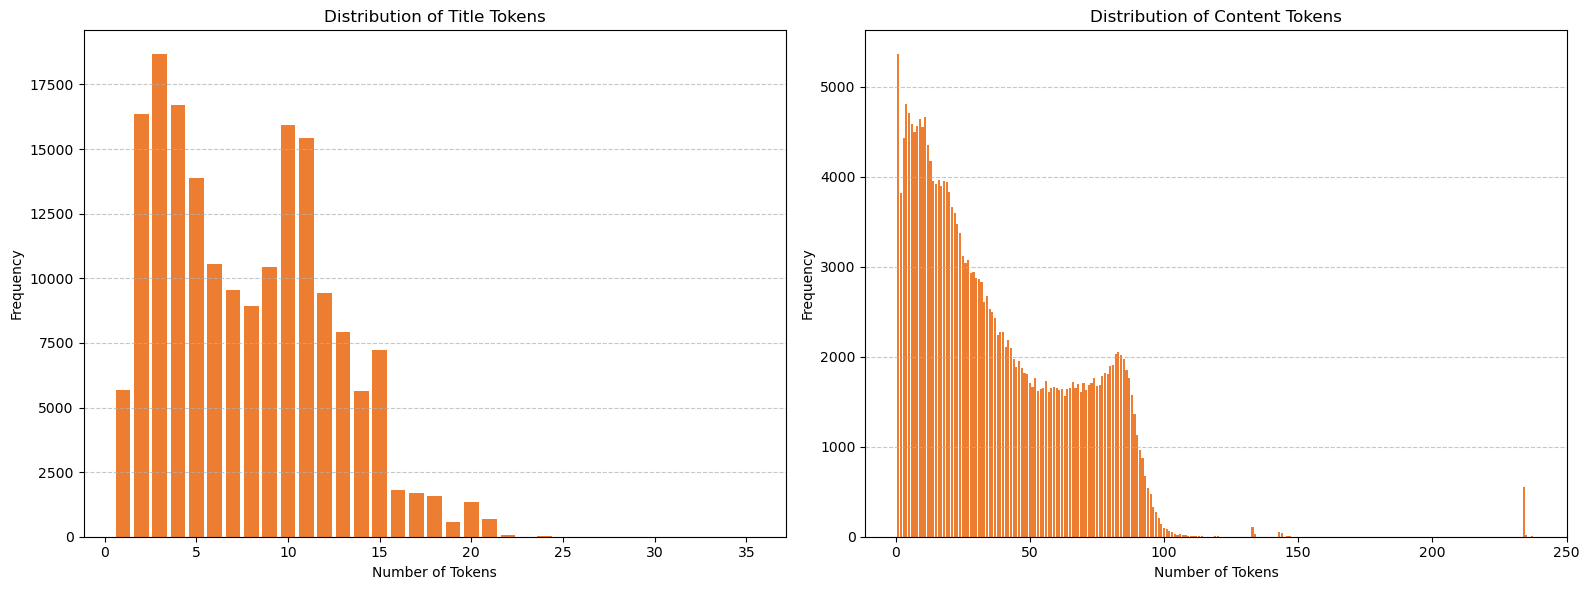

In [96]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(16, 6))

# Subplot 1: Distribution of Title Tokens
plt.subplot(1, 2, 1)

# Splitting the 'title' column into words and calculating the length of each title
title_word_lengths = df['title'].str.split().str.len()

# Counting the occurrences of each title length
title_length_counts = title_word_lengths.value_counts()

# Plotting the results in a bar chart
plt.bar(title_length_counts.index, title_length_counts.values, color='#ed7d31')

# Adding labels and titles to the plot
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title(f'Distribution of Title Tokens')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Distribution of Content Tokens
plt.subplot(1, 2, 2)

# Splitting the 'content' column into words and calculating the length of each content
content_word_lengths = df['content'].str.split().str.len()[df['content'].str.split().str.len() < 1000]

# Counting the occurrences of each content length
content_length_counts = content_word_lengths.value_counts()
content_length_counts = content_length_counts[content_length_counts > 1]

# Plotting the results in a bar chart
plt.bar(content_length_counts.index, content_length_counts.values, color='#ed7d31')

# Adding labels and titles to the plot
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title(f'Distribution of Content Tokens')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Displaying the subplots
plt.show()


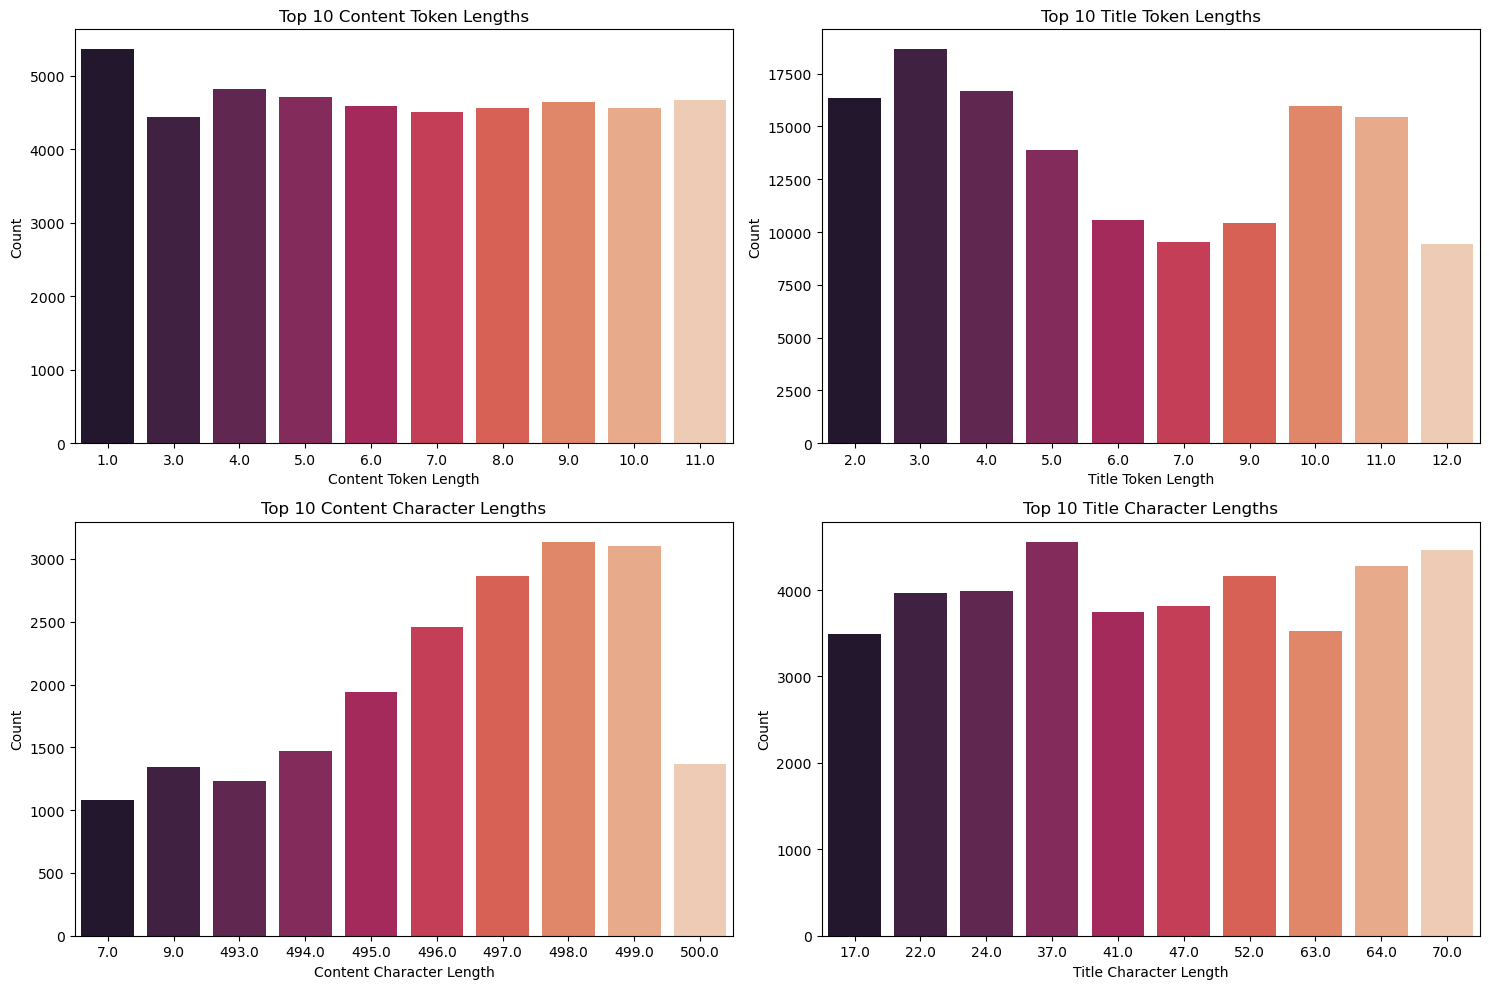

In [103]:
def plot_top_token_lengths(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create a subplot with 2 rows and 2 columns

    # Loop through the columns 'content' and 'title'
    for idx, column_name in enumerate(['content', 'title']):
        # Split the column into tokens, count token lengths, and get value counts
        tokens = df[column_name].str.split().str.len().value_counts().reset_index()
        tokens_10 = tokens.head(10).sort_values(by='count', ascending=False)  # Sort in descending order

        # Create the bar plot in the corresponding subplot
        sns.barplot(data=tokens_10, x=column_name, y='count', palette='rocket', ax=axes[0, idx])
        axes[0, idx].set_xlabel(f'{column_name.capitalize()} Token Length')
        axes[0, idx].set_ylabel('Count')
        axes[0, idx].set_title(f'Top 10 {column_name.capitalize()} Token Lengths')

        # Calculate character lengths for the same column and get their value counts
        char_lengths = df[column_name].str.len().value_counts().reset_index()
        char_lengths_10 = char_lengths.head(10).sort_values(by='count', ascending=False)  # Sort in descending order

        # Create the bar plot for character lengths in the second row
        sns.barplot(data=char_lengths_10, x=column_name, y='count', palette='rocket', ax=axes[1, idx])
        axes[1, idx].set_xlabel(f'{column_name.capitalize()} Character Length')
        axes[1, idx].set_ylabel('Count')
        axes[1, idx].set_title(f'Top 10 {column_name.capitalize()} Character Lengths')

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

plot_top_token_lengths(df)


#### In The content Column The highest Distribution of Token is 1 
- In which top 10 value count are below


In [69]:
# Extract single-word content and count occurrences
content_hig_token = df.content[df.content.str.split().str.len() == 1].value_counts().reset_index()
content_hig_token

,content,count
0,foreign,532
1,[deleted],258
2,Same,211
3,[,95
4,[removed],91
...,...,...
2444,Yikes,1
2445,Facts!,1
2446,https://youtu.be/tAtaIZD0Ebs,1
2447,Minging,1


In [70]:
# Display the first 10 rows of the 'content_hig_token' DataFrame.
content_hig_token.head(10)


,content,count
0,foreign,532
1,[deleted],258
2,Same,211
3,[,95
4,[removed],91
5,Music],90
6,Yes,67
7,Water,43
8,Lol,40
9,No,34


#### Calculate the mean length of content

In [71]:
# Calculate the mean length of strings in the 'content' column of the 'content_hig_token' DataFrame.
mean_length = content_hig_token.content.str.len().mean()
mean_length


21.935075541037158

In [90]:
content_hig_token.content[content_hig_token.content.str.len()<21].value_counts().reset_index()

,content,count
0,foreign,1
1,Cope.,1
2,Krats,1
3,Okee,1
4,Menkeys,1
...,...,...
1832,PLEASE,1
1833,Sup,1
1834,NO!,1
1835,Smh,1


In [93]:
df.content[df.content.str.split().str.len()>200]

1841     | Property | Normal | Nightmare | Hell |\n| --...
1850     | Property | Normal | Nightmare | Hell |\n| --...
1860     | Property | Normal | Nightmare | Hell |\n| --...
2075     | Property | Normal | Nightmare | Hell |\n| --...
2703     | Property | Normal | Nightmare | Hell |\n| --...
                               ...                        
47974    | Gefallener | Wert | Normal | Alptraum | Höll...
47975    | Schlächter | Wert | Normal | Alptraum | Höll...
47976    | Teuflischer | Wert | Normal | Alptraum | Höl...
47977    | Dunkle Kreatur | Wert | Normal | Alptraum | ...
57341    |  |\n|  |\n| None | Dessin : Améthyste Étoilé...
Name: content, Length: 590, dtype: object

In [97]:
df.content[df.content.str.split().str.len()>200].value_counts().reset_index()

,content,count
0,| Property | Normal | Nightmare | Hell |\n| --...,3
1,| Property | Normal | Nightmare | Hell |\n| --...,3
2,| Property | Normal | Nightmare | Hell |\n| --...,3
3,| Property | Normal | Nightmare | Hell |\n| --...,3
4,| Property | Normal | Nightmare | Hell |\n| --...,2
...,...,...
567,| Property | Normal | Nightmare | Hell |\n| --...,1
568,| Property | Normal | Nightmare | Hell |\n| --...,1
569,| Property | Normal | Nightmare | Hell |\n| --...,1
570,| Property | Normal | Nightmare | Hell |\n| --...,1


**Content Character highest frequancy analysis**

In [73]:
# Filter the 'content' column of the DataFrame to select entries with a length of 3
# Then, count the occurrences of each unique value in the filtered data
result = df.content[df.content.str.len() == 3].value_counts().reset_index()
result

,content,count
0,Yes,67
1,Lol,40
2,Yep,27
3,Yup,21
4,lol,12
...,...,...
161,Sus,1
162,Fml,1
163,me.,1
164,0_0,1


In [74]:
# Filter the DataFrame to select rows where the length of 'content' is equal to 3
filtered_df = df[df.content.str.len() == 3]

# Count the occurrences of each unique value in the filtered 'content' column
value_counts = filtered_df['content'].value_counts()

# Display the top 10 value counts
top_10_counts = value_counts.head(10)

top_10_counts


content
Yes    67
Lol    40
Yep    27
Yup    21
lol    12
yes    11
wow    11
LOL     9
hey     8
No.     7
Name: count, dtype: int64

#### Title column Analysis

In [75]:
# Create a DataFrame 'Token_token_1' by filtering 'df.title' to include only entries with a single word in the title.
Token_token_1 = df.title[df.title.str.split().str.len() == 1].value_counts().reset_index()
Token_token_1


,title,count
0,Necro,64
1,Disconnected?,50
2,【ユニークが落ちやすい！】隠し宝箱＆最強イベント【Diablo4】,43
3,Baal,21
4,Tathamet,19
...,...,...
3682,Tabarzin,1
3683,Mojo,1
3684,Parashu,1
3685,Labrys,1


In [76]:
Token_token_1

,title,count
0,Necro,64
1,Disconnected?,50
2,【ユニークが落ちやすい！】隠し宝箱＆最強イベント【Diablo4】,43
3,Baal,21
4,Tathamet,19
...,...,...
3682,Tabarzin,1
3683,Mojo,1
3684,Parashu,1
3685,Labrys,1


#### In The Title Column The highest Distribution of Token is 3
- In which top 10 value count are below


In [77]:
# Filter titles with a word count of 3
title_hig_token = df.title[df.title.str.split().str.len() == 3].value_counts().reset_index()
title_hig_token

,title,count
0,【Diablo 4】最強ローグでいく、ティア4トーメント攻略＆レベル上げやレジェンダリー稼ぎ...,608
1,Tips for leveling,438
2,Server's finally down,225
3,11 years later…,114
4,Server just crashed?,102
...,...,...
11643,Beast (Disambiguation) General,1
11644,Hawthorne Gable Trivia,1
11645,Horrus the Nightstalker,1
11646,Hrugowl the Defiant,1


In [79]:
title_hig_token.head(10)

,title,count
0,【Diablo 4】最強ローグでいく、ティア4トーメント攻略＆レベル上げやレジェンダリー稼ぎ...,608
1,Tips for leveling,438
2,Server's finally down,225
3,11 years later…,114
4,Server just crashed?,102
5,Diablo 4 Review,100
6,Diablo 4 incelemesi,54
7,"Jax, the druid",54
8,Edgemaster's Aspect Disabled,51
9,Wow (Act VI),42


#### Average character length for Title

In [82]:
# Calculate the mean length of titles in the 'title' column after converting them to title case
mean_title_length = title_hig_token.title.str.len().mean()
mean_title_length


20.908052884615383

#### Character highest frequancy analysis 4 and 15

In [83]:
# Filter rows in 'df' where the length of 'title' is 4
filtered_df = df[df.title.str.len() == 4]

# Count the occurrences of each unique value in the 'title' column
value_counts = filtered_df['title'].value_counts().reset_index()

value_counts

,title,count
0,Baal,21
1,NPCs,10
2,天使议会,8
3,Mago,7
4,Leah,6
...,...,...
251,Wand,1
252,Claw,1
253,Blur,1
254,Eiku,1


In [84]:
# Filter the DataFrame to select rows where the 'title' column has a length of 15 characters.
filtered_titles = df[df['title'].str.len() == 15]

# Count the occurrences of each unique title and reset the index.
title_counts = filtered_titles['title'].value_counts().reset_index()

# Display the resulting DataFrame.
title_counts


,title,count
0,Seasonal Renown,404
1,500k~ exp/2mins,123
2,11 years later…,114
3,Diablo 4 Review,100
4,Diablo II Story,14
...,...,...
1797,Unwavering Will,1
1798,Diadem See Also,1
1799,Sword and Board,1
1800,Invader Invader,1
